<a href="https://colab.research.google.com/github/josefinasolisb/project1/blob/main/Project1_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project_1/sales_predictions_2023.csv'
df = pd.read_csv(data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##1. ¿Cuántas filas y columnas hay?

Viendo el output de df.info()
* Filas = 8523
* Columnas = 12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##2. ¿Cuáles son los tipos de datos de cada variable?

Viendo el output de df.info()

* Item_Identifier (object)
* Item_Weight (float64)
* Item_Fat_Content (object)
* Item_Visibility (float64)
* Item_Type (object)
* Item_MRP (float64)
* Outlet_Identifier (object)
* Outlet_Establishment_Year (int64)  
* Outlet_Size (object)
* Outlet_Location_Type (object)
* Outlet_Type (object)
* Item_Outlet_Sales (float64)

##3. ¿Hay duplicados? Si es el caso, elimínelos.

Viendo el outtput de df.duplicated() y df.duplicated().sum()

No hay ningun duplicado.

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [6]:
df.duplicated().sum()

0

##4. Identifique los valores faltantes.

Viendo el outtput de df.isna().sum()

Hay valores falantes en:

* Item_Weight = 1463
* Outlet_Size = 2410

Se incluyó un heatmap para ver patrones en los datos faltantes

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

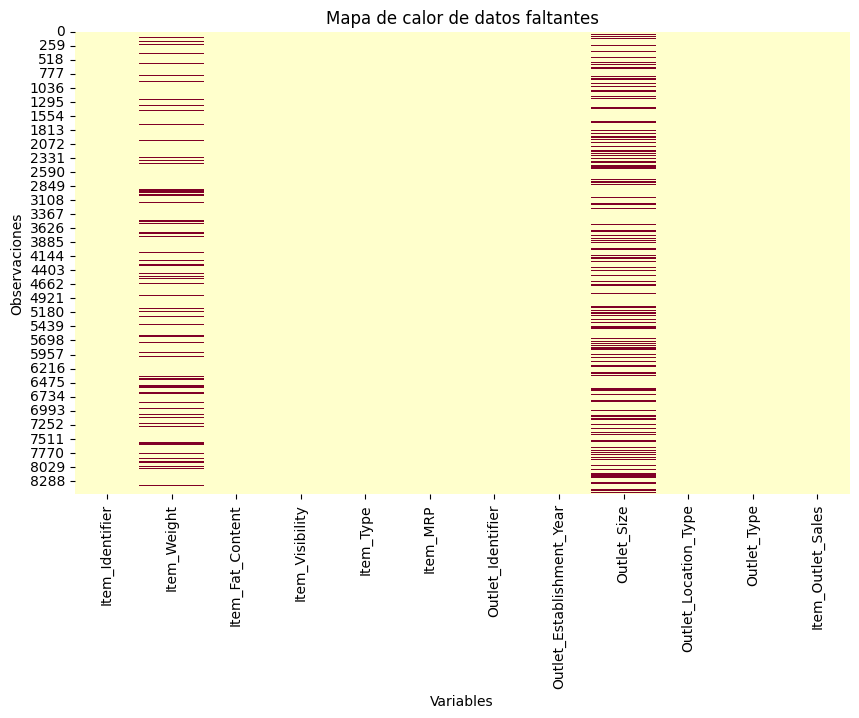

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='YlOrRd', cbar=False)
plt.title('Mapa de calor de datos faltantes')
plt.xlabel('Variables')
plt.ylabel('Observaciones')
plt.show()

##5. Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).

Item_Weight -> 1463 datos faltantes

Por motivos de falta de conocimiento en la naturaleza de las variables y los objetivos para los que se van a usar los datos, se inicio el analisis realizando imputaciones con promedio, mediana, KNN y MICE. Luego se realizó histogramas comparativos entre los 4 métodos incluyendo un histograma de los valores sin imputar de Item_Weight. La conclusion de esto fue que aun no se cuenta con los conocimientos ni la experiencia suficientes para trabajar con alguno de estos métodos. Por esta razon se procedio a hacer la imputacion utilizando GroupBy.

El método GroupBy ha sido enseñado y practicado en clase. Luego de revisar el dataset, se seleccionó la columna Item_Identifier por sentido comun e intuición, ya que era la unica que podria tener alguna relacion con Item_Weight y con valores consistentes. Por ultimo, se aplicaron los valores de Item_Weight asociados a Item_Identifier en los datos faltantes.





*   Variable numerica (float64)



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Imputacion con promedio

In [7]:
prom_pesos = df['Item_Weight'].mean()
a = df['Item_Weight'].fillna(prom_pesos)

Imputacion con mediana

In [13]:
mediana_pesos = df['Item_Weight'].median()
b = df['Item_Weight'].fillna(mediana_pesos)

Imputacion con KNN

In [14]:
from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=5)
knn = imputer.fit_transform(df[['Item_Weight']])

Imputacion con MICE

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=349d5231fb78830408638beb8e9f280c968ec494428859d2d30a8ce333ec1d30
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=0b203a21176c70e002b1900a3b82ed2525ab7e5378a0e87e9fbc1b6705d705c0
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
import numpy as np

In [ ]:
imputer = IterativeImputer()
MICE_1 = imputer.fit_transform(df[['Item_Weight']])
MICE_final = np.mean(MICE_1, axis=0)
MICE_final_df = pd.DataFrame(MICE_final.reshape(1, -1), columns=df[['Item_Weight']].columns)
MICE_final_df.head()

,Item_Weight
0,12.857645


In [ ]:
valor_fijo = 12.86
MICE = df['Item_Weight'].fillna(valor_fijo)
MICE.head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Comparacion de imputaciones

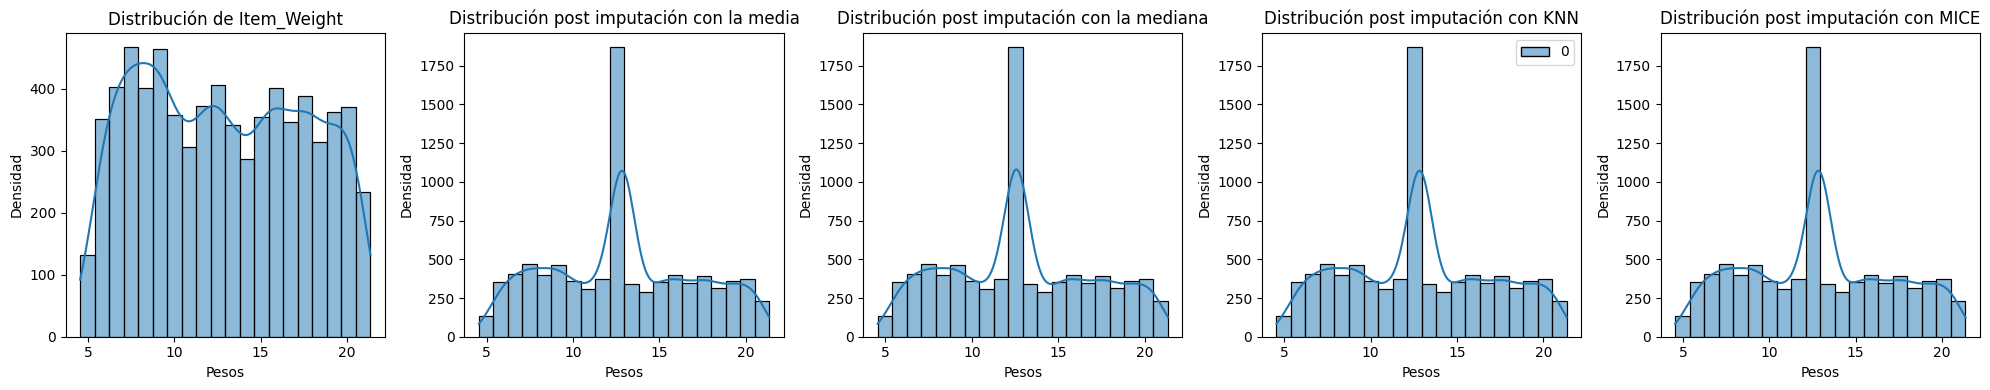

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Histograma Item Weight
sns.histplot(data=df['Item_Weight'], ax=axes[0], bins=20, kde=True)
axes[0].set_xlabel('Pesos')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Distribución de Item_Weight')

# Histograma imputacion con media
sns.histplot(a, ax=axes[1], bins=20, kde=True)
axes[1].set_xlabel('Pesos')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución post imputación con la media')

# Histograma imputacion con mediana
sns.histplot(b, ax=axes[2], bins=20, kde=True)
axes[2].set_xlabel('Pesos')
axes[2].set_ylabel('Densidad')
axes[2].set_title('Distribución post imputación con la mediana')

# Histograma imputacion con KNN
sns.histplot(knn, ax=axes[3], bins=20, kde=True)
axes[3].set_xlabel('Pesos')
axes[3].set_ylabel('Densidad')
axes[3].set_title('Distribución post imputación con KNN')

# Histograma imputacion con MICE
sns.histplot(MICE, ax=axes[4], bins=20, kde=True)
axes[4].set_xlabel('Pesos')
axes[4].set_ylabel('Densidad')
axes[4].set_title('Distribución post imputación con MICE')

# Ajusta el diseño de los subgráficos
plt.tight_layout()
plt.show()


Imputacion con GroupBy

In [8]:
selected_1 = df[(df['Item_Identifier'].isin(df['Item_Identifier'].unique()))]
x = selected_1.groupby('Item_Identifier')['Item_Weight'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#print(x)

In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(x))

Outlet_Size -> 2410 datos faltantes

*   Variable categorica (object)

Por los mismos motivos que para Outlet_Size se inicio el analisis realizando imputaciones con media, forward fill, backward fill y valor fijo. Luego se realizó graficos de barras comparativos entre los 4 métodos incluyendo uno de los valores sin imputar de Outlet_Size. La conclusion la misma del caso anterior. Por esta razon se procedio a hacer la imputacion utilizando GroupBy.

Luego de revisar el dataset, se seleccionó la columna Outlet_Establishment_Year y Outlet_Location_Type por sentido comun e intuición, ya que era la unica que podria tener alguna relacion con Outlet_Size y con valores consistentes. Sin embargo, al obtener la moda de Outlet_Establishment_Year se pudo ver que algunos años no tenian ningun valor. Luego se hizo lo mismo con Outlet_Location_Type y se encontro que si habian valores de moda para cada atributo. Por esta razon se aplicaron los valores de Outlet_Size asociados a Outlet_Location_Type en los datos faltantes.

Imputacion utilizando moda

In [ ]:
valor_moda = df['Outlet_Size'].mode()[0]
impt_moda = df['Outlet_Size'].fillna(valor_moda)

Imputacion utilizando valores hacia adelante

In [ ]:
impt_forward = df['Outlet_Size'].fillna(method='ffill')

Imputacion utilizando valores hacia atras

In [ ]:
impt_backward = df['Outlet_Size'].fillna(method='bfill')

Imputacion utilizando valor fijo

In [ ]:
valor_fijo = 'High'
z = df['Outlet_Size'].fillna(valor_fijo)

Comparacion de imputaciones

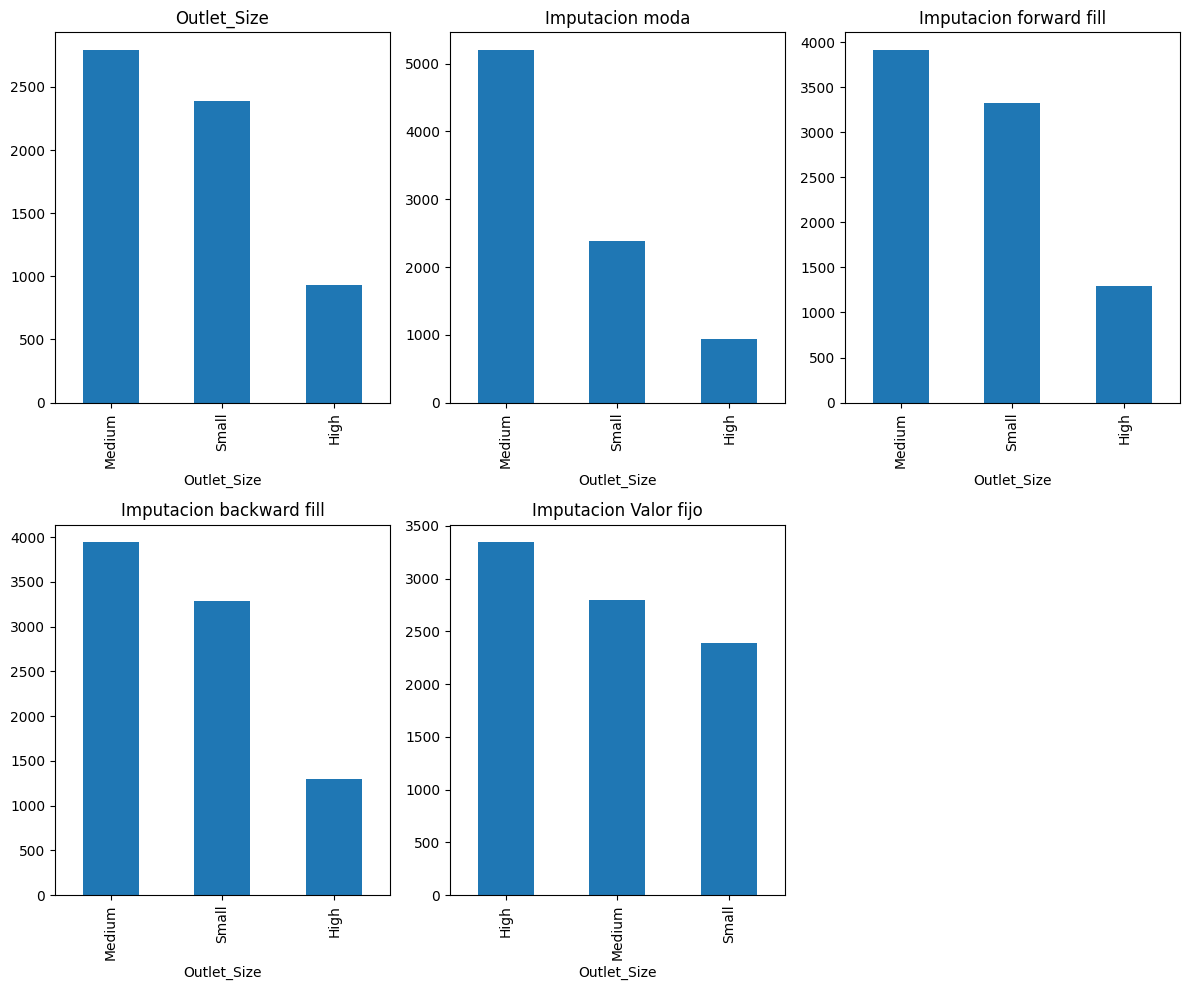

In [ ]:
plt.figure(figsize=(12, 10))

# Gráfico de barras de Outlet Size
plt.subplot(2, 3, 1)
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.title('Outlet_Size')

# Gráfico de barras imputacion con moda
plt.subplot(2, 3, 2)
impt_moda.value_counts().plot(kind='bar')
plt.title('Imputacion moda')

# Gráfico de barras imputacion con forward fill
plt.subplot(2, 3, 3)
impt_forward.value_counts().plot(kind='bar')
plt.title('Imputacion forward fill')

# Gráfico de barras imputacion con backward fill
plt.subplot(2, 3, 4)
impt_backward.value_counts().plot(kind='bar')
plt.title('Imputacion backward fill')

# Gráfico de barras imputacion con valor fijo
plt.subplot(2, 3, 5)
z.value_counts().plot(kind='bar')
plt.title('Imputacion Valor fijo')

plt.tight_layout()
plt.show()



Imputacion con GroupBy

In [10]:
selected_2 = df[(df['Outlet_Establishment_Year'] >= 1985) & (df['Outlet_Establishment_Year'] <= 2009)]
y = selected_2.groupby('Outlet_Establishment_Year')['Outlet_Size'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(y)

Outlet_Establishment_Year
1985    Medium
1987      High
1997     Small
1998      None
1999    Medium
2002      None
2004     Small
2007      None
2009    Medium
Name: Outlet_Size, dtype: object


In [11]:
selected_3 = df[(df['Outlet_Location_Type'].isin(df['Outlet_Location_Type'].unique()))]
w = selected_3.groupby('Outlet_Location_Type')['Outlet_Size'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(w)

Outlet_Location_Type
Tier 1     Small
Tier 2     Small
Tier 3    Medium
Name: Outlet_Size, dtype: object


In [12]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Location_Type'].map(w))

##6. Confirme que no hay valores faltantes después de tratarlos

Se puede ver que para Outlet_Size ya no hay datos faltantes. Sin embargo siguen quedando 4 valores faltantes en Item_Weight, que fueron completados con la mediana. Se tomo esta decision ya que son solo 4 valores faltantes, es decir una parte poco representativa del total.

In [13]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
mediana = df['Item_Weight'].median()
mediana

12.65

In [15]:
valor_fijo = 12.65
df['Item_Weight'] = df['Item_Weight'].fillna(valor_fijo)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7. Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)

Se eligieron 3 variables categoricas que podrian tener inconsistencias. Esta decison fue tomada en base a revisar rapidamente el dataframe. Se utilizo .unique() en las 3 columnas para verificar inconsistencias. La unica columna con inconsistencia en los datos fue Item_Fat_Content: ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']. Se corriegieron los datos con .replace() para que Low Fat = [low fat, LF] y Regular = [reg]. Para verificar la correcion se volvió a usar .unique en la columna Item_Fat_Content.

In [16]:
Item_Fat_Content = df['Item_Fat_Content'].unique()
Item_Fat_Content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
Item_Type = df['Item_Type'].unique()
Item_Type

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
Outlet_Type = df['Outlet_Type'].unique()
Outlet_Type

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])

In [19]:
Item_Fat_Content_corregido = df['Item_Fat_Content'].unique()
Item_Fat_Content_corregido

array(['Low Fat', 'Regular'], dtype=object)

## 8. Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)

In [20]:
estadisticas_resumidas = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].describe().round(2)
estadisticas_resumidas

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,2181.29
std,4.65,0.05,62.28,1706.50
min,4.56,0.00,31.29,33.29
25%,8.78,0.03,93.83,834.25
50%,12.65,0.05,143.01,1794.33
75%,16.85,0.09,185.64,3101.30
max,21.35,0.33,266.89,13086.96


##Histograma

In [21]:
i_weight = df['Item_Weight']
i_visibility = df['Item_Visibility']*100
i_MRP = df['Item_MRP']/6
i_outlet = df['Item_Outlet_Sales']/400

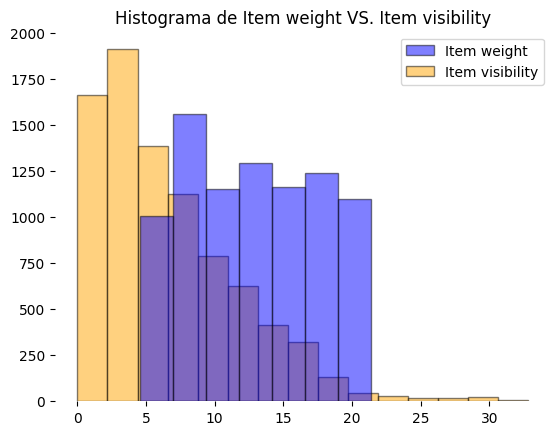

In [22]:
plt.hist(i_weight, bins=7, edgecolor='black', color='blue', alpha=0.5, label='Item weight', zorder=3)
plt.hist(i_visibility, bins=15, edgecolor='black', color='orange',alpha=0.5, label='Item visibility', zorder=2)

plt.title('Histograma de Item weight VS. Item visibility')
plt.legend()

plt.gca().set_frame_on(False)
plt.show()

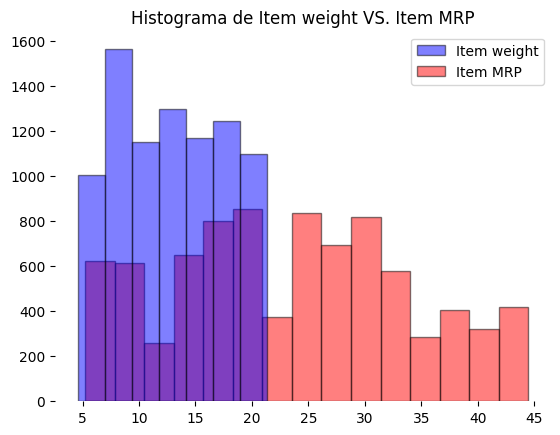

In [23]:
plt.hist(i_weight, bins=7, edgecolor='black', color='blue', alpha=0.5, label='Item weight', zorder=3)
plt.hist(i_MRP, bins=15, edgecolor='black', color='red',alpha=0.5, label='Item MRP', zorder=2)

plt.title('Histograma de Item weight VS. Item MRP')
plt.legend()

plt.gca().set_frame_on(False)
plt.show()

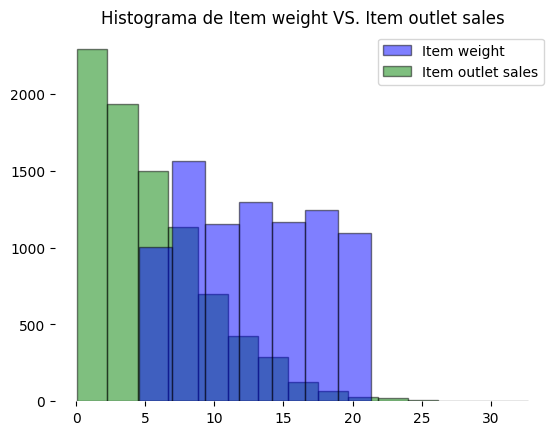

In [24]:
plt.hist(i_weight, bins=7, edgecolor='black', color='blue', alpha=0.5, label='Item weight', zorder=3)
plt.hist(i_outlet, bins=15, edgecolor='black', color='green',alpha=0.5, label='Item outlet sales', zorder=2)

plt.title('Histograma de Item weight VS. Item outlet sales')
plt.legend()

plt.gca().set_frame_on(False)
plt.show()

##Boxplot

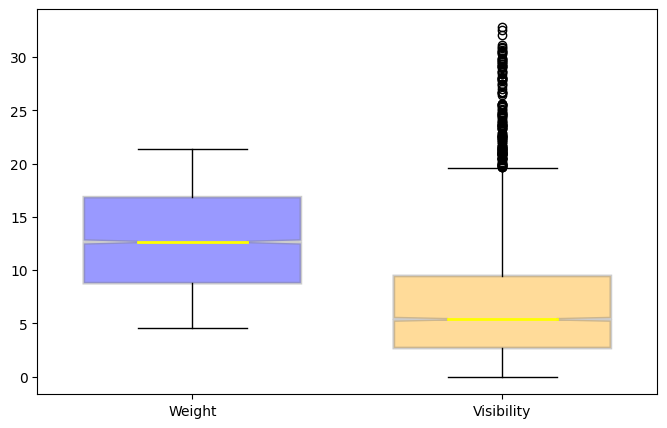

In [25]:
import matplotlib.colors as mcolors
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,5))

boxplot = axes.boxplot([i_weight, i_visibility],
                       notch=True,
                       labels=['Weight', 'Visibility'],
                       widths = .7,
                       patch_artist=True,
                       medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                       boxprops=dict(facecolor='orange', edgecolor='gray', alpha=0.4, linewidth=2))

boxplot1 = boxplot['boxes'][0]
boxplot1.set_facecolor('blue')

plt.show()

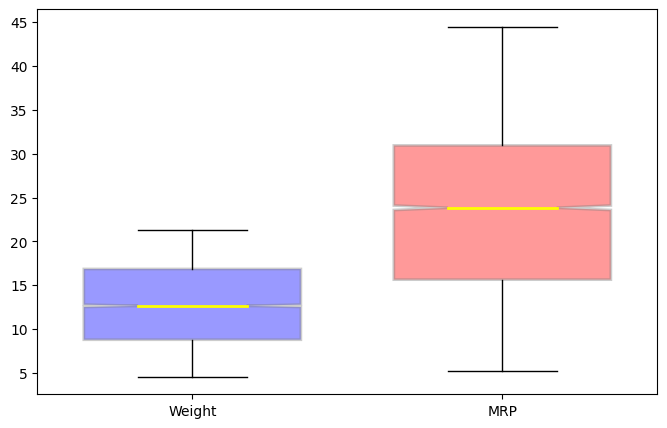

In [26]:
import matplotlib.colors as mcolors
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,5))

boxplot = axes.boxplot([i_weight, i_MRP],
                       notch=True,
                       labels=['Weight', 'MRP'],
                       widths = .7,
                       patch_artist=True,
                       medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                       boxprops=dict(facecolor='red', edgecolor='gray', alpha=0.4, linewidth=2))

boxplot1 = boxplot['boxes'][0]
boxplot1.set_facecolor('blue')

plt.show()

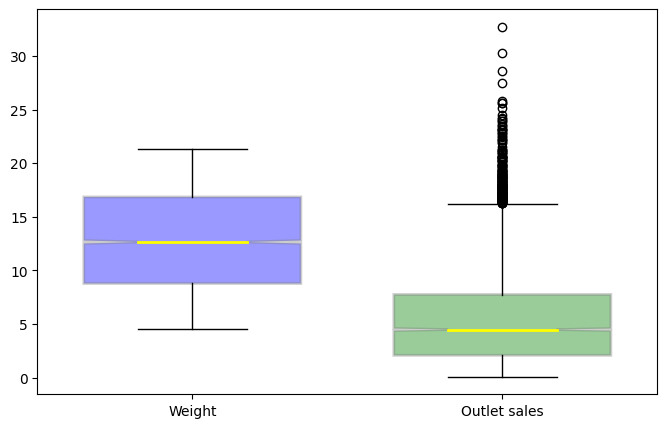

In [27]:
import matplotlib.colors as mcolors
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,5))

boxplot = axes.boxplot([i_weight, i_outlet],
                       notch=True,
                       labels=['Weight', 'Outlet sales'],
                       widths = .7,
                       patch_artist=True,
                       medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                       boxprops=dict(facecolor='green', edgecolor='gray', alpha=0.4, linewidth=2))

boxplot1 = boxplot['boxes'][0]
boxplot1.set_facecolor('blue')

plt.show()

##Mapa de calor de correlación

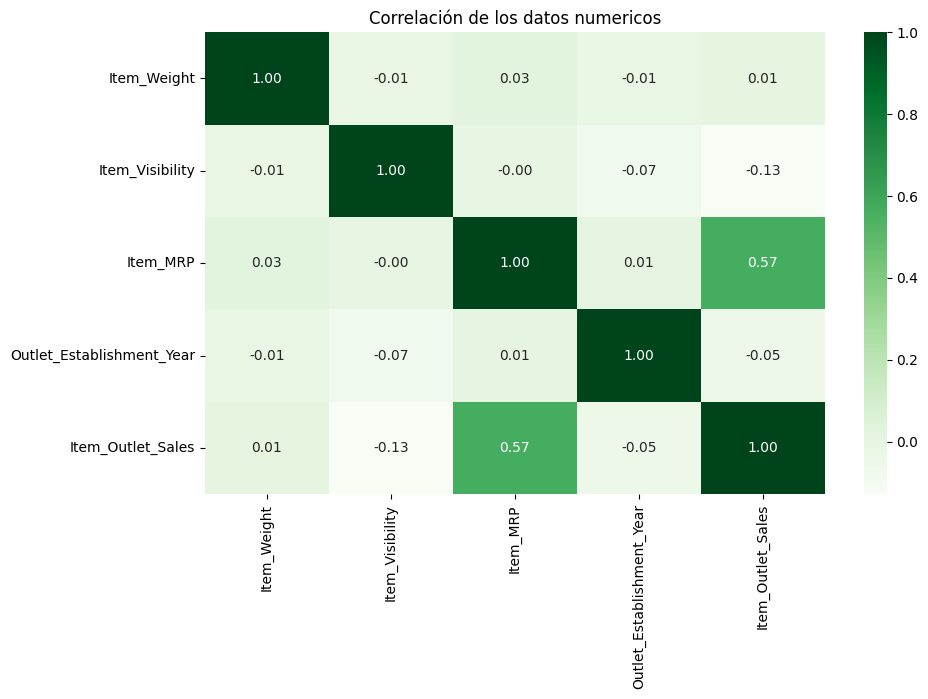

In [28]:
df_numeric = df.select_dtypes(include='number')

correlation_matrix = df_numeric.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlación de los datos numericos')
plt.show()